In [57]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = r"D:\IIT GANDHINAGAR\IITGN ACADS\SEM 7\ML\Assign_1\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train"
test_path = r"D:\IIT GANDHINAGAR\IITGN ACADS\SEM 7\ML\Assign_1\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data               
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Done Combining the training data
Done Combining the testing data
Done Combining the data
Done Combining the testing data
Done Combining the data


In [58]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


**Task 1 : Exploratory Data Analysis (EDA)**

Question 1: Plot Waveforms

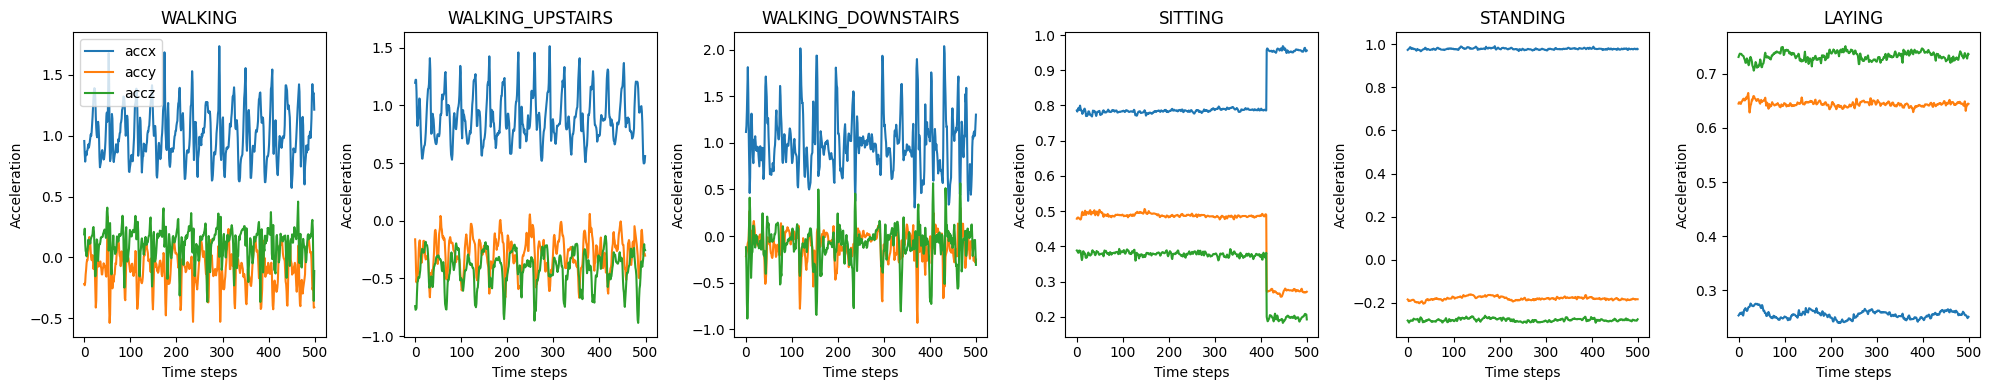

In [59]:
import matplotlib.pyplot as plt
import numpy as np

classes_rev = {1: "WALKING",
               2: "WALKING_UPSTAIRS",
               3: "WALKING_DOWNSTAIRS",
               4: "SITTING",
               5: "STANDING",
               6: "LAYING"}

plt.figure(figsize=(20, 4))

for i in range(1, 7):
    idx = np.where(y_train == i)[0][0]  
    sample = X_train[idx]
    
    plt.subplot(1, 6, i)
    plt.plot(sample[:, 0], label='accx')
    plt.plot(sample[:, 1], label='accy')
    plt.plot(sample[:, 2], label='accz')
    plt.title(classes_rev[i])
    plt.xlabel('Time steps')
    plt.ylabel('Acceleration')
    if i == 1:  
        plt.legend()

plt.tight_layout()
plt.show()


Yes, the model should be able to based the given dataset. As seen from the plots of the six activites:
1. Dynamic Activites: Walking kind of activities shows periodicity and but varying amplitude and frequencies from which they could be identified.
2. Static Activities: While sitting, standing and laying can be differentiated visually, as they have low variance. Laying has lower x component of acceleration than y and z. Also some step disturbance is seen while sitting. In case of standing it is shomewhat horizontal straight line. While in generally these three activities can be differntiated based on magnitutde of x,y,z accelerations.



Question 2: Static vs. Dynamic Activities

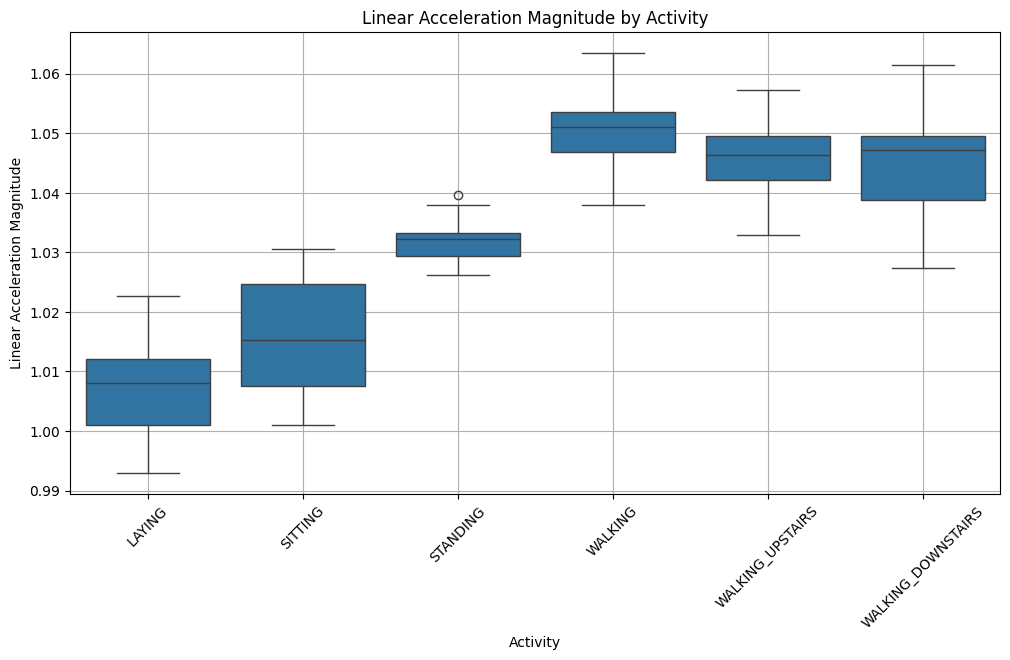

Linear Acceleration Magnitude Statistics per Activity:
                         mean       var
Activity                              
LAYING              1.006826  0.000061
SITTING             1.015555  0.000084
STANDING            1.031647  0.000012
WALKING             1.050682  0.000040
WALKING_DOWNSTAIRS  1.044090  0.000078
WALKING_UPSTAIRS    1.044857  0.000040


In [60]:
linear_acc = np.sqrt(np.sum(X_train**2, axis=2))  
avg_linear_acc = np.mean(linear_acc, axis=1)

df_linear = pd.DataFrame({
    'Activity': pd.Series(y_train).map(classes_rev),
    'Linear Acceleration Magnitude': avg_linear_acc
})

plt.figure(figsize=(12, 6))
sns.boxplot(x='Activity', y='Linear Acceleration Magnitude', data=df_linear,
            order=['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])
plt.title('Linear Acceleration Magnitude by Activity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

df_summary = df_linear.groupby("Activity")["Linear Acceleration Magnitude"].agg(['mean', 'var'])
print("Linear Acceleration Magnitude Statistics per Activity:\n", df_summary)


No, we do not necessarily need a machine learning model to differentiate between static (laying, sitting, standing) and dynamic (walking, walking_upstairs, walking_downstairs) activities. Also from the boxplot the distintion of the magnitude at 1.1 can be made. 

The provided boxplot show that a simple **threshold rule** would be highly effective at separating these two groups.

The table confirms this. The highest mean magnitude for a static activity is `1.0316` (STANDING), while the lowest mean for a dynamic activity is `1.0440` (WALKING_DOWNSTAIRS). The two groups do not overlap.

Performing PCA on the total acceleration time series...


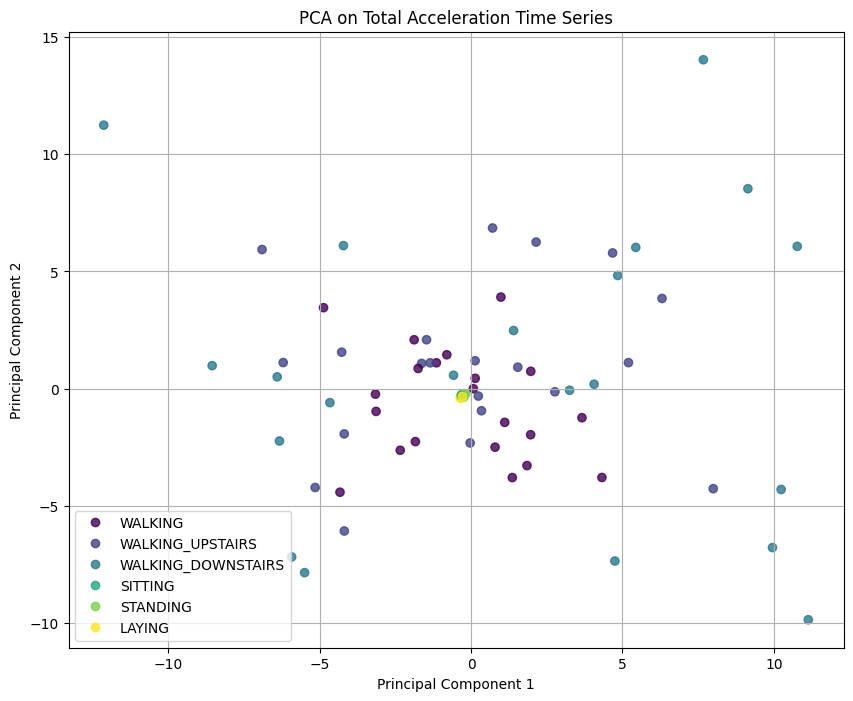

In [61]:

from sklearn.decomposition import PCA

print("Performing PCA on the total acceleration time series...")
pca_total_acc = PCA(n_components=2, random_state=42)
X_train_pca_total_acc = pca_total_acc.fit_transform(total_acc_sq)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca_total_acc[:, 0], X_train_pca_total_acc[:, 1], c=y_train, cmap='viridis', alpha=0.8)
plt.title('PCA on Total Acceleration Time Series')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=classes_rev.values())
plt.grid(True)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10840\825203839.py:16: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel_features = tsfel.time_series_features_extractor(cfg, X_train_tsfel_input, verbose=0)


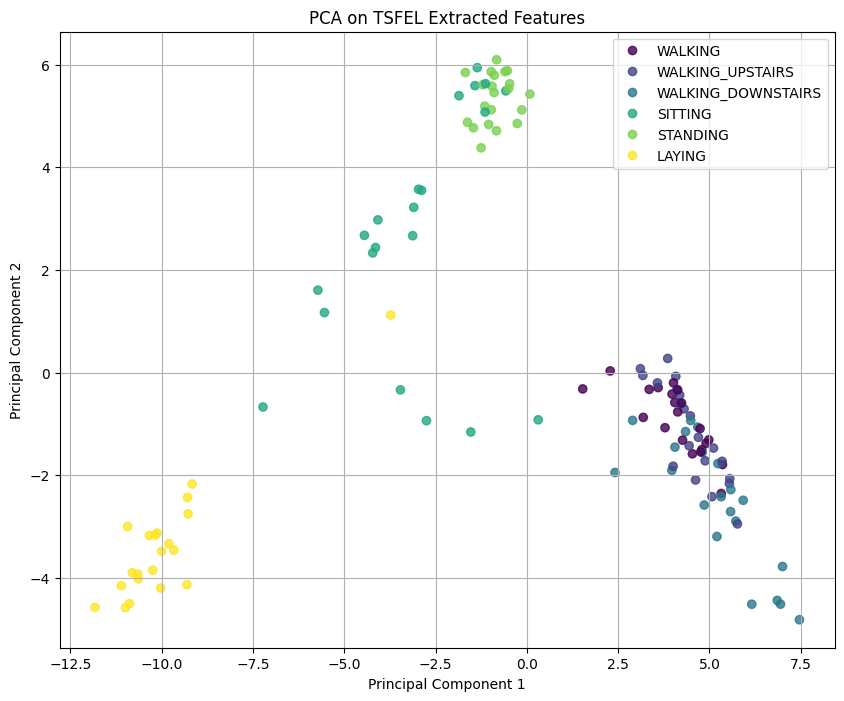

In [62]:
# PCA on TSFEL Features

try:
    import tsfel
except ImportError:
    print("Installing TSFEL...")
    %pip install tsfel
    import tsfel

from sklearn.preprocessing import StandardScaler

X_train_tsfel_input = [pd.DataFrame(sample, columns=['acc_x', 'acc_y', 'acc_z']) for sample in X_train]

cfg = tsfel.get_features_by_domain('statistical')

X_train_tsfel_features = tsfel.time_series_features_extractor(cfg, X_train_tsfel_input, verbose=0)
X_train_tsfel_features.fillna(X_train_tsfel_features.mean(), inplace=True)

scaler = StandardScaler()
X_train_tsfel_scaled = scaler.fit_transform(X_train_tsfel_features)

# Apply PCA
pca_tsfel = PCA(n_components=2, random_state=42)
X_train_pca_tsfel = pca_tsfel.fit_transform(X_train_tsfel_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca_tsfel[:, 0], X_train_pca_tsfel[:, 1], c=y_train, cmap='viridis', alpha=0.8)
plt.title('PCA on TSFEL Extracted Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=classes_rev.values())
plt.grid(True)
plt.show()

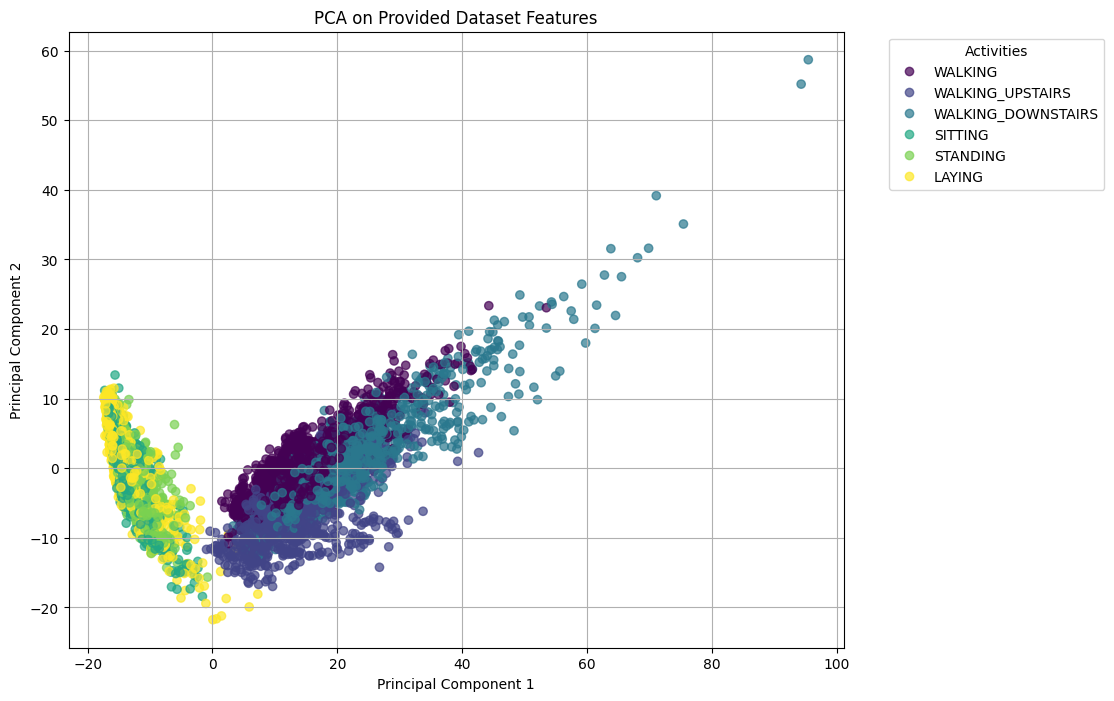

In [63]:
# On Provided Dataset Features

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_train_feat = pd.read_csv(os.path.join(train_path, "X_train.txt"), delim_whitespace=True, header=None)
y_train_feat = pd.read_csv(os.path.join(train_path, "y_train.txt"), delim_whitespace=True, header=None)[0]

scaler_C = StandardScaler()
X_train_feat_scaled = scaler_C.fit_transform(X_train_feat)

pca_C = PCA(n_components=2)
X_train_pca_C = pca_C.fit_transform(X_train_feat_scaled)

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca_C[:, 0], X_train_pca_C[:, 1], 
                      c=y_train_feat, cmap='viridis', alpha=0.7)

plt.title('PCA on Provided Dataset Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

handles, _ = scatter.legend_elements()
plt.legend(handles, [ACTIVITIES[i] for i in sorted(ACTIVITIES.keys())], 
           title="Activities", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()


### Comparison of PCA Results
1. PCA on raw total acceleration shows poor class separation with heavy overlap.  
2. PCA on TSFEL features forms around three spreaded clusters, clearly separating LAYING and partially distinguishing static vs dynamic activities.  
3. PCA on the provided dataset features gives two well-separated groups (static vs dynamic) with tighter clustering.  

Hence, TSFEL is better at highlighting minute differences (e.g., LAYING), while the provided dataset features give clearer overall separation.


 **Correlation matrix of the features obtained by TSFEL and provided in the dataset**

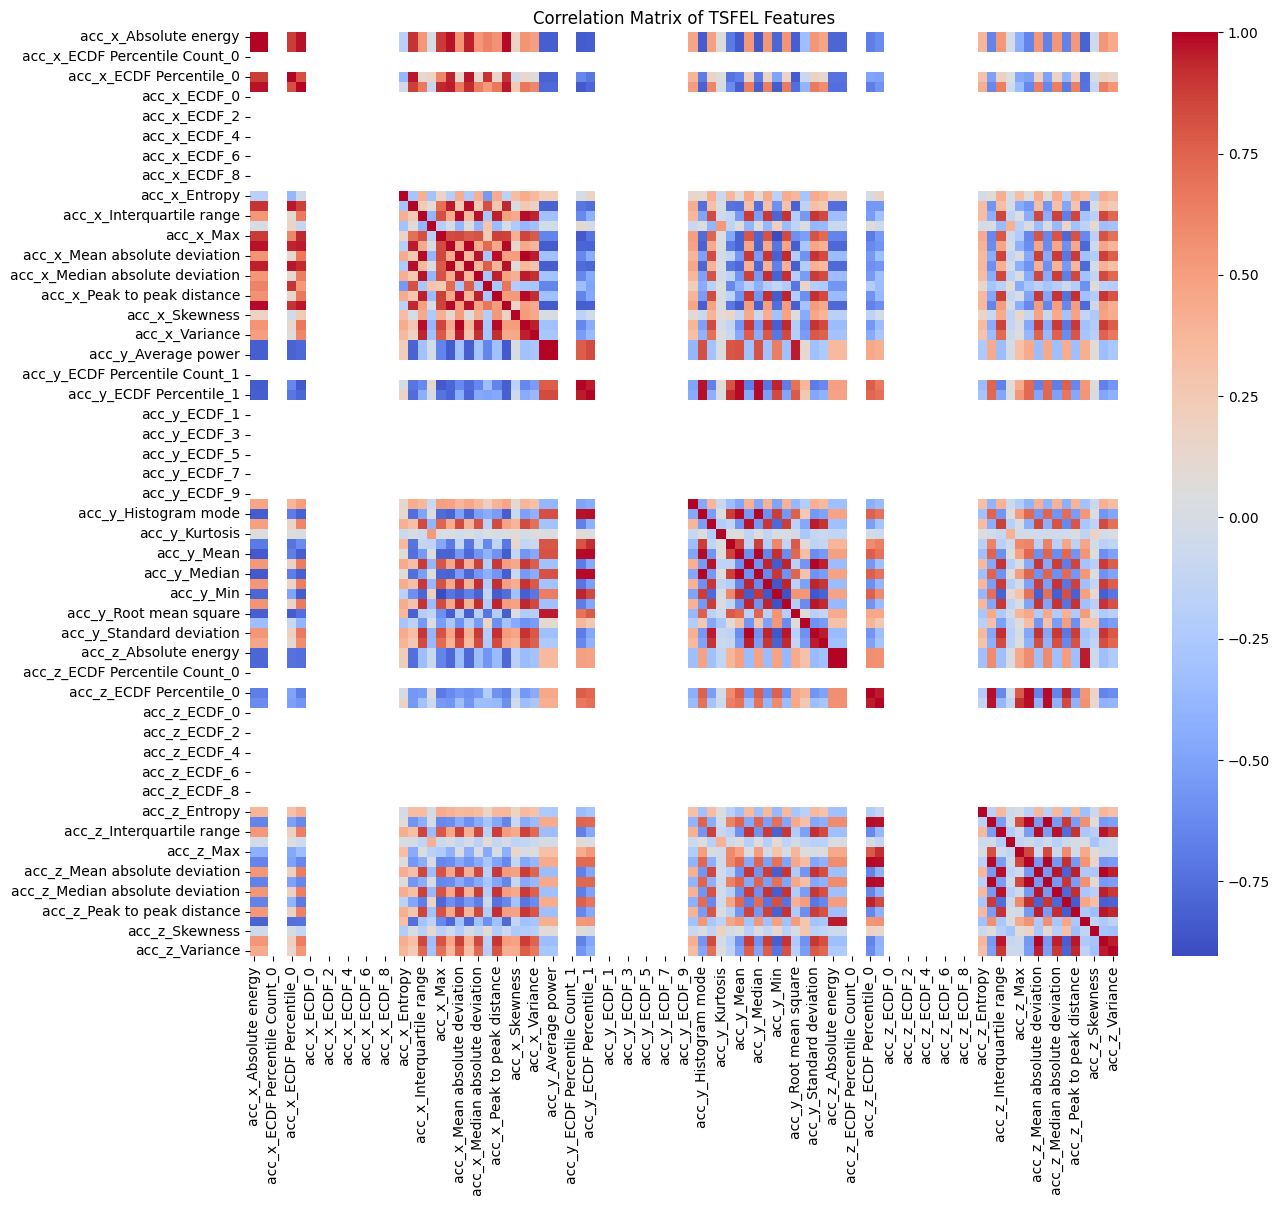

In [64]:
import seaborn as sns
correlation_matrix_tsfel = X_train_tsfel_features.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_tsfel, cmap='coolwarm')
plt.title('Correlation Matrix of TSFEL Features')
plt.show()

### Correlation Analysis of TSFEL Features

- **Highly correlated groups**:
  - For each axis (`x`, `y`, `z`), the features:
    - *Absolute energy*, *Variance*, *Average power*, and *Root mean square*  
      → correlation ≈ **1.0** (redundant).
  - ECDF features for each axis (`ECDF_0`, `ECDF_2`, …, `ECDF_9`)  
      → strong internal correlations.
  - *Mean absolute deviation* and *Median absolute deviation* (per axis)  
      → moderately correlated.

- **Redundant features**:
  - Energy/variance-type measures are interchangeable.
  - Multiple ECDF percentiles capture similar information.

- **Less redundant / unique features**:
  - *Entropy*, *Skewness*, *Kurtosis*, and *Histogram mode* provide distinct information.

**Conclusion**:  
Yes, there are redundant features (energy/variance group, ECDF features).  
Removing or selecting one representative from each highly correlated group can reduce dimensionality without losing significant


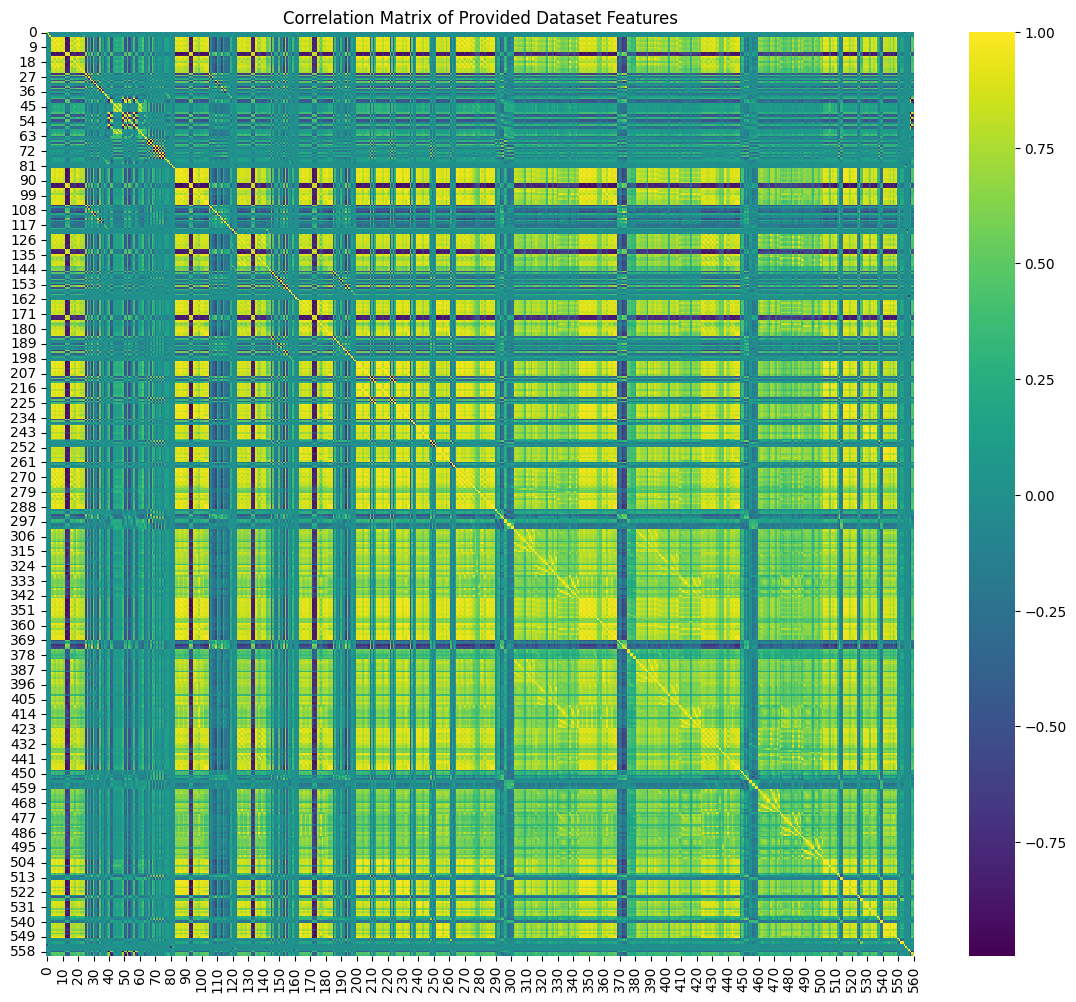

In [65]:
# Correlation Matrix of Provided Dataset Features
import seaborn as sns

correlation_matrix_provided = X_train_feat.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_provided, cmap='viridis')
plt.title('Correlation Matrix of Provided Dataset Features')
plt.show()

In [66]:
# Finding Highly Correlated Pairs

corr_matrix = correlation_matrix_provided.abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

# Threhold
threshold = 0.95

highly_correlated_pairs = sol[sol > threshold]

print(f"Found {len(highly_correlated_pairs)} pairs with correlation > {threshold}:\n")
print(highly_correlated_pairs.head(20)) 

Found 2281 pairs with correlation > 0.95:

528  533    1.0
200  205    1.0
201  214    1.0
200  213    1.0
     218    1.0
252  257    1.0
213  218    1.0
502  507    1.0
212  225    1.0
226  231    1.0
515  520    1.0
205  213    1.0
203  216    1.0
202  215    1.0
204  217    1.0
206  219    1.0
205  218    1.0
211  224    1.0
209  222    1.0
210  223    1.0
dtype: float64


**Task 2 : Decision Trees for Human Activity Recognition**

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

--- Model 1: Raw Accelerometer Data ---
Flattened raw data shape: (126, 1500)

Accuracy on Raw Data: 0.6111

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.25      0.22      0.24         9
  WALKING_UPSTAIRS       0.50      0.56      0.53         9
WALKING_DOWNSTAIRS       0.25      0.11      0.15         9
           SITTING       0.67      0.89      0.76         9
          STANDING       0.80      0.89      0.84         9
            LAYING       0.90      1.00      0.95         9

          accuracy                           0.61        54
         macro avg       0.56      0.61      0.58        54
      weighted avg       0.56      0.61      0.58        54



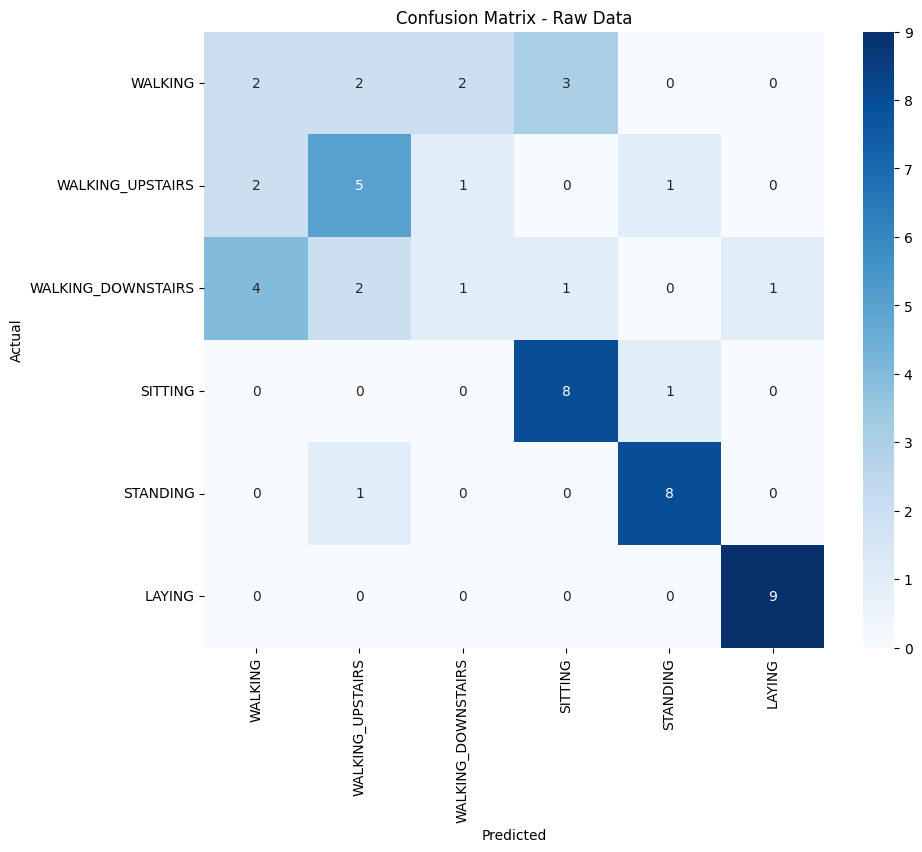

In [68]:
# Model 1 - Raw Data
print("--- Model 1: Raw Accelerometer Data ---")

X_train_raw_flat = X_train.reshape(X_train.shape[0], -1)
X_test_raw_flat = X_test.reshape(X_test.shape[0], -1)
print(f"Flattened raw data shape: {X_train_raw_flat.shape}")

model_raw = DecisionTreeClassifier(random_state=42)
model_raw.fit(X_train_raw_flat, y_train)

y_pred_raw = model_raw.predict(X_test_raw_flat)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

print(f"\nAccuracy on Raw Data: {accuracy_raw:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_raw, target_names=classes_rev.values()))

# Plotting the Confusion Matrix
cm_raw = confusion_matrix(y_test, y_pred_raw)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes_rev.values(), yticklabels=classes_rev.values())
plt.title('Confusion Matrix - Raw Data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


--- Model 2: TSFEL Features ---
Extracting TSFEL features from train and test sets...


C:\Users\Admin\AppData\Local\Temp\ipykernel_10840\1913008278.py:11: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel_features = tsfel.time_series_features_extractor(cfg, X_train_tsfel_input, verbose=0)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10840\1913008278.py:12: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel_features = tsfel.time_series_features_extractor(cfg, X_test_tsfel_input, verbose=0)


Feature extraction and scaling complete.

Accuracy on TSFEL Features: 0.8333

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.62      0.56      0.59         9
  WALKING_UPSTAIRS       0.67      0.67      0.67         9
WALKING_DOWNSTAIRS       0.70      0.78      0.74         9
           SITTING       1.00      1.00      1.00         9
          STANDING       1.00      1.00      1.00         9
            LAYING       1.00      1.00      1.00         9

          accuracy                           0.83        54
         macro avg       0.83      0.83      0.83        54
      weighted avg       0.83      0.83      0.83        54



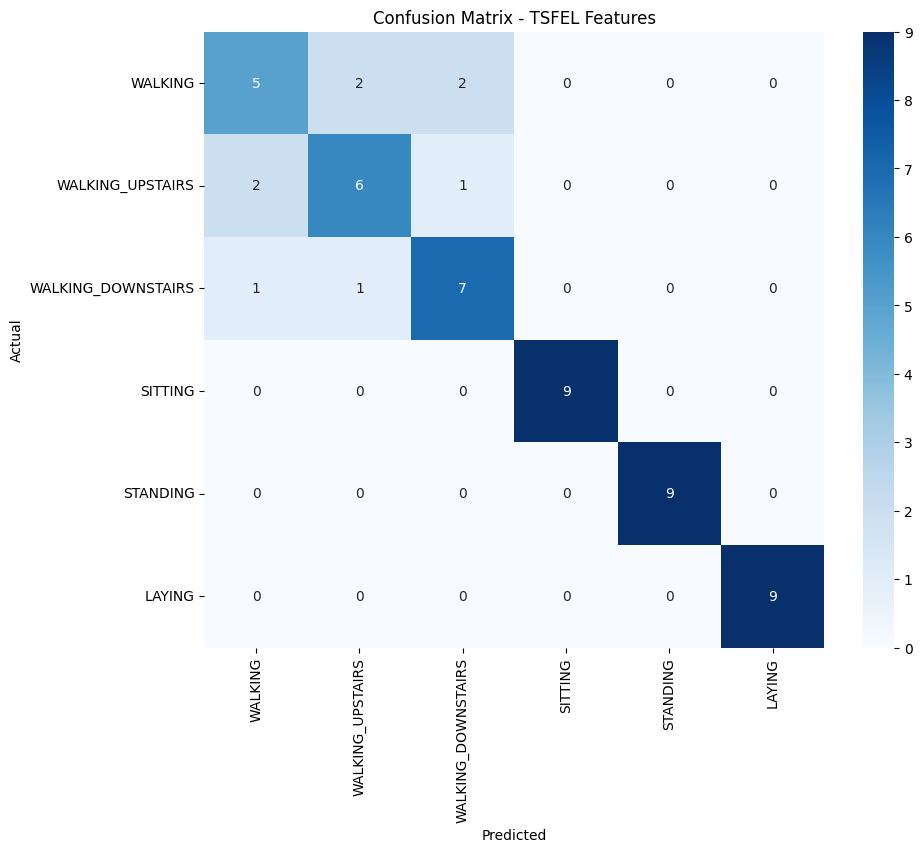

In [69]:
# Model 2 - TSFEL Features

print("\n--- Model 2: TSFEL Features ---")

X_train_tsfel_input = [pd.DataFrame(sample, columns=['acc_x', 'acc_y', 'acc_z']) for sample in X_train]
X_test_tsfel_input = [pd.DataFrame(sample, columns=['acc_x', 'acc_y', 'acc_z']) for sample in X_test]

cfg = tsfel.get_features_by_domain('statistical')

print("Extracting TSFEL features from train and test sets...")
X_train_tsfel_features = tsfel.time_series_features_extractor(cfg, X_train_tsfel_input, verbose=0)
X_test_tsfel_features = tsfel.time_series_features_extractor(cfg, X_test_tsfel_input, verbose=0)

X_train_tsfel_features.fillna(X_train_tsfel_features.mean(), inplace=True)
X_test_tsfel_features.fillna(X_train_tsfel_features.mean(), inplace=True)

scaler_tsfel = StandardScaler()
X_train_tsfel_scaled = scaler_tsfel.fit_transform(X_train_tsfel_features)
X_test_tsfel_scaled = scaler_tsfel.transform(X_test_tsfel_features)
print("Feature extraction and scaling complete.")

model_tsfel = DecisionTreeClassifier(random_state=42)
model_tsfel.fit(X_train_tsfel_scaled, y_train)

y_pred_tsfel = model_tsfel.predict(X_test_tsfel_scaled)
accuracy_tsfel = accuracy_score(y_test, y_pred_tsfel)

print(f"\nAccuracy on TSFEL Features: {accuracy_tsfel:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_tsfel, target_names=classes_rev.values()))

# Plot Confusion Matrix
cm_tsfel = confusion_matrix(y_test, y_pred_tsfel)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_tsfel, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes_rev.values(), yticklabels=classes_rev.values())
plt.title('Confusion Matrix - TSFEL Features')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Training on 7352 samples.

Accuracy on Provided Features: 0.8622

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.83      0.92      0.87       496
  WALKING_UPSTAIRS       0.83      0.78      0.80       471
WALKING_DOWNSTAIRS       0.89      0.83      0.86       420
           SITTING       0.83      0.76      0.80       491
          STANDING       0.80      0.86      0.83       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



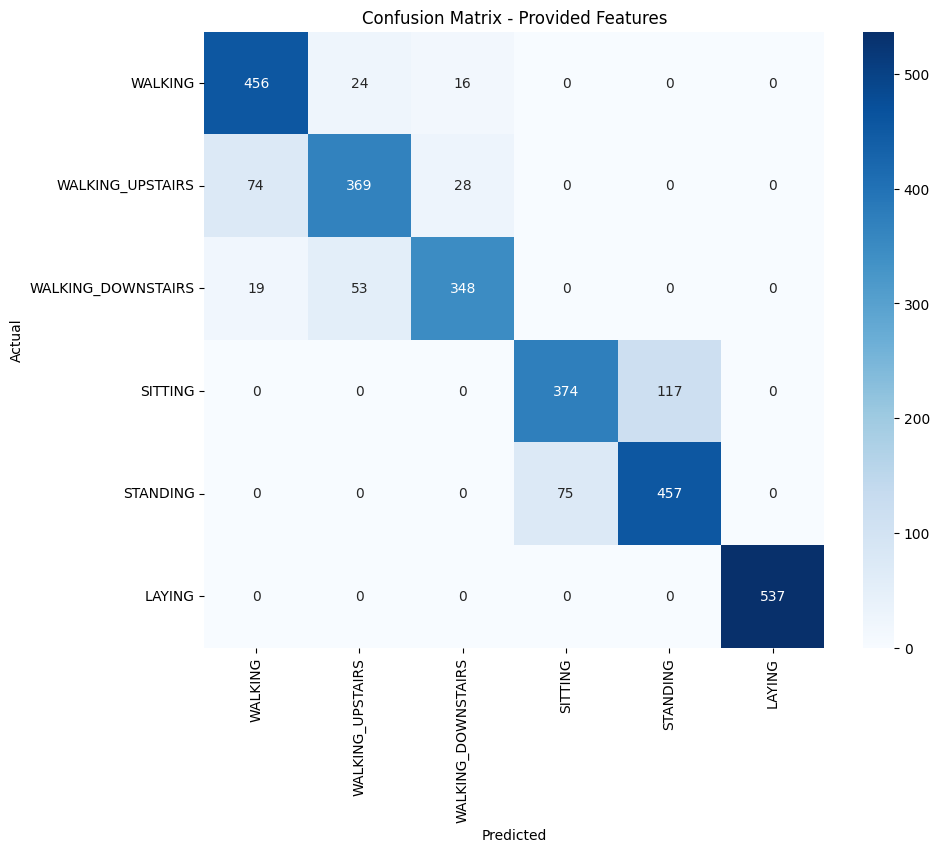

In [70]:
# Model 3 - Provided Features (Independent Analysis)


X_train_feat = pd.read_csv(os.path.join(train_path, 'X_train.txt'), delim_whitespace=True, header=None)
y_train_feat = pd.read_csv(os.path.join(train_path, 'y_train.txt'), delim_whitespace=True, header=None)[0]
X_test_feat = pd.read_csv(os.path.join(test_path, 'X_test.txt'), delim_whitespace=True, header=None)
y_test_feat = pd.read_csv(os.path.join(test_path, 'y_test.txt'), delim_whitespace=True, header=None)[0]

scaler_C = StandardScaler()
X_train_feat_scaled = scaler_C.fit_transform(X_train_feat)
X_test_feat_scaled = scaler_C.transform(X_test_feat)
print(f"Training on {X_train_feat.shape[0]} samples.")

model_provided = DecisionTreeClassifier(random_state=42)
model_provided.fit(X_train_feat_scaled, y_train_feat)

y_pred_provided = model_provided.predict(X_test_feat_scaled)
accuracy_provided = accuracy_score(y_test_feat, y_pred_provided)

print(f"\nAccuracy on Provided Features: {accuracy_provided:.4f}\n")
print("Classification Report:")

print(classification_report(y_test_feat, y_pred_provided, target_names=classes_rev.values()))

cm_provided = confusion_matrix(y_test_feat, y_pred_provided)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_provided, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes_rev.values(), yticklabels=classes_rev.values())
plt.title('Confusion Matrix - Provided Features')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



###  Model Comparison

| Model                         | Accuracy | Strengths                                    | Weaknesses                                    |
|-------------------------------|----------|----------------------------------------------|-----------------------------------------------|
| **Raw Accelerometer Data**    | 0.61     | Good for static (LAYING, STANDING)           | Very poor for dynamic walking activities       |
| **TSFEL Features**            | 0.83     | Perfect for static (SITTING, STANDING, LAYING)| Some confusion in walking-related activities   |
| **Provided Dataset Features** | 0.86     | Best overall, strong in walking & laying     | Minor confusion between SITTING vs STANDING    |

---


The **model using provided dataset features** is the best (highest accuracy and balanced performance).


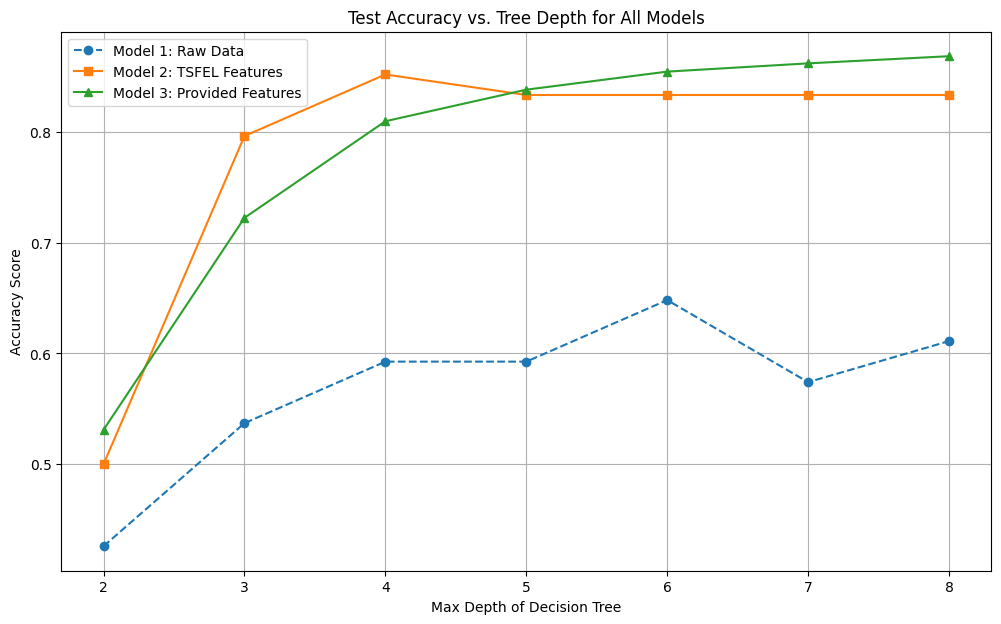

In [71]:
# Training the decision tree with Varying Depths
depths = range(2, 9)
raw_accuracies = []
tsfel_accuracies = []
provided_accuracies = []

for depth in depths:
    # Model 1: Raw data
    model_raw_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_raw_depth.fit(X_train_raw_flat, y_train)
    raw_accuracies.append(accuracy_score(y_test, model_raw_depth.predict(X_test_raw_flat)))

    # Model 2: TSFEL features
    model_tsfel_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_tsfel_depth.fit(X_train_tsfel_scaled, y_train)
    tsfel_accuracies.append(accuracy_score(y_test, model_tsfel_depth.predict(X_test_tsfel_scaled)))

    # Model 3: Provided features
    model_provided_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model_provided_depth.fit(X_train_feat_scaled, y_train_feat)
    provided_accuracies.append(accuracy_score(y_test_feat, model_provided_depth.predict(X_test_feat_scaled)))

plt.figure(figsize=(12, 7))
plt.plot(depths, raw_accuracies, marker='o', linestyle='--', label='Model 1: Raw Data')
plt.plot(depths, tsfel_accuracies, marker='s', linestyle='-', label='Model 2: TSFEL Features')
plt.plot(depths, provided_accuracies, marker='^', linestyle='-', label='Model 3: Provided Features')

plt.title('Test Accuracy vs. Tree Depth for All Models')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy Score')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

Yes.  
## Sitting vs. Standing Confusion  

The model performs worst in distinguishing **SITTING** and **STANDING**.  

### Likely Reason: 
- Both are **static postures** with the posture upright.  
- Smartphone orientation relative to gravity is nearly the same.  
- Accelerometer mainly measures constant ~1g on the same axis.  
- Results in **almost identical sensor data**, giving the model little to separate them.  
